# Process Erin's .mat files for spikes

In [1]:
import scipy.io
import numpy as np
import os
import matplotlib.pyplot as plt

SPIKES_DIRECTORY = "../../Data/spikes"
ERIN_DIRECTORY = (
    "../../../../erinconr/projects/fc_toolbox/results/analysis/intermediate/"
)

0 soz (1, 1)
1 name (1,)
2 times (2392, 1)
3 spikes (161, 2392)
4 coi_global (2392, 1)
5 rl (161, 2392)
6 labels (161, 1)
7 bipolar_labels (161, 1)
8 bipolar_pair (148, 2)
9 locs (161, 3)
10 bipolar_locs (161, 3)
11 anatomy (161, 1)
12 bad_anatomy_flag (1, 1)
13 ana_loc (161, 1)
14 ana_lat (161, 1)
15 file_times (2392, 1)
16 file_index (2392, 1)
17 ad (161, 2392)
18 block_dur (1, 1)
19 ns (161, 2392)
20 n_rm_ictal (1, 1)
21 sz_times (3, 2)
22 sz_semiology (3, 1)
23 rid (1, 1)
24 avg_fc (161, 161)
25 seq_info (2, 2392)
26 clinical (1, 1)
27 leader (161, 2392)
28 mod_midnight (2392, 1)
29 ns_car (161, 2392)
30 avg_fc_car (161, 161)
31 ns_bi (161, 2392)
32 avg_fc_bi (161, 161)
33 bp (161, 5, 2392)
34 bp_bi (161, 5, 2392)
35 avg_coh (12880, 6)
36 avg_coh_bi (12880, 6)
37 good_spikes (1, 1)
38 native_locs (161, 3)
39 native_bipolar_locs (161, 3)
40 fc_car_ws (2, 1)
41 fc_bi_ws (2, 1)
42 spikes_ws (2, 1)
43 rl_ws (2, 1)
44 coh_car_ws (2, 1)
45 coh_bi_ws (2, 1)
46 bp_bi_ws (2, 1)
47 bp_car_ws (2, 1)

In [2]:
temp = []
# Iterate through all .mat files in ../../../erinconr/projects/fc_toolbox/results/analysis/intermediate/
for filename in os.listdir(ERIN_DIRECTORY):
    mat_file = scipy.io.loadmat(
        os.path.join(ERIN_DIRECTORY, filename),
    )
    mat_file = mat_file["summ"][0]
    for index, key in enumerate(mat_file.dtype.names):
        # print(index, key, mat_file[0][index].shape)
        if key == "spikes":
            temp.append(index)
spikes_index = np.unique(np.array(temp, dtype=int))
assert spikes_index.shape[0] == 1
spikes_index = spikes_index[0]

In [3]:
def average_samples(patient_ad_ratio):
    # Get the shape of the original array
    original_shape = patient_ad_ratio.shape

    # Calculate new shape
    num_channels = original_shape[0]
    num_samples = original_shape[1]
    num_whole_groups = num_samples // 6
    num_remaining_samples = num_samples % 6

    # Reshape the array to average every 6 samples
    whole_groups_array = patient_ad_ratio[:, : num_whole_groups * 6].reshape(
        num_channels, num_whole_groups, 6
    )
    averaged_array = whole_groups_array.mean(axis=2)

    if num_remaining_samples > 0:
        remaining_array = patient_ad_ratio[:, num_whole_groups * 6 :].mean(
            axis=1, keepdims=True
        )
        averaged_array = np.concatenate((averaged_array, remaining_array), axis=1)

    return averaged_array


# # Test function with some random data
# # Create a 4x31 numpy array, i.e. 4 channels with 31 samples each
# patient_ad_ratio = np.random.rand(4, 32)
# averaged_array = average_samples(patient_ad_ratio)
# print(patient_ad_ratio, averaged_array)

In [4]:
for filename in os.listdir(ERIN_DIRECTORY):
    patient_hup_id = int(filename[3:6])
    mat_file = scipy.io.loadmat(os.path.join(ERIN_DIRECTORY, filename))
    mat_file = mat_file["summ"][0][0]
    patient_spikes = mat_file[spikes_index]
    print(patient_spikes.shape)
    # num_channels = mat_file[spikes_index].shape[0]
    # assert patient_spikes.shape[0] == num_channels
    # hourly_spikes = average_samples(patient_spikes)
    # num_hours = hourly_spikes.shape[1]
    # assert hourly_spikes.shape[0] == num_channels

    # # Save hourly_ad_ratio to a .npy file named hup_{patient_hup_id}.npy
    # np.save(f"{SPIKES_DIRECTORY}/raw/HUP_{patient_hup_id}.npy", hourly_spikes)

    # hourly_spikes_avg = np.nanmean(hourly_spikes, axis=0)
    # assert hourly_spikes_avg.shape[0] == num_hours

    # # Save hourly_ad_ratio_avg to a .npy file named HUP_{patient_hup_id}.npy
    # np.save(
    #     f"{SPIKES_DIRECTORY}/hourly_all/HUP_{patient_hup_id}.npy",
    #     hourly_spikes_avg,
    # )

    # hourly_spikes_sum = np.nansum(hourly_spikes, axis=0)
    # assert hourly_spikes_sum.shape[0] == num_hours

    # # Save hourly_ad_ratio_avg to a .npy file named HUP_{patient_hup_id}.npy
    # np.save(
    #     f"{SPIKES_DIRECTORY}/hourly_sum_all/HUP_{patient_hup_id}.npy",
    #     hourly_spikes_sum,
    # )
    # print(
    #     f"HUP{patient_hup_id}",
    #     patient_spikes.shape,
    #     hourly_spikes.shape,
    # )

    # soz_channel_indices = mat_file[0][0][0][1].flatten().astype(int) - 1
    # hourly_spikes_soz = hourly_spikes[soz_channel_indices, :]
    # # print(hourly_spikes_soz.shape)
    # assert hourly_spikes_soz.shape == (len(soz_channel_indices), num_hours)

    # # Save hourly_ad_ratio to a .npy file named hup_{patient_hup_id}.npy
    # np.save(
    #     f"{SPIKES_DIRECTORY}/hourly_raw/soz/HUP_{patient_hup_id}.npy", hourly_spikes_soz
    # )

    # hourly_spikes_avg_soz = np.nanmean(hourly_spikes_soz, axis=0)
    # assert hourly_spikes_avg_soz.shape[0] == num_hours

    # # Save hourly_ad_ratio_avg to a .npy file named HUP_{patient_hup_id}.npy
    # np.save(
    #     f"{SPIKES_DIRECTORY}/hourly_avg/soz/HUP_{patient_hup_id}.npy",
    #     hourly_spikes_avg_soz,
    # )

    # hourly_spikes_sum_soz = np.nansum(hourly_spikes_soz, axis=0)
    # assert hourly_spikes_sum_soz.shape[0] == num_hours

    # # Save hourly_ad_ratio_avg to a .npy file named HUP_{patient_hup_id}.npy
    # np.save(
    #     f"{SPIKES_DIRECTORY}/hourly_sum/soz/HUP_{patient_hup_id}.npy",
    #     hourly_spikes_sum_soz,
    # )

(161, 2392)
(169, 1530)
(98, 878)
(205, 1562)
(120, 1823)
(140, 289)
(104, 2705)
(133, 367)
(90, 1100)
(136, 1439)
(128, 1063)
(102, 1114)
(97, 892)
(150, 1298)
(94, 1840)
(176, 1828)
(181, 1014)
(105, 1192)
(289, 3145)
(152, 1815)
(128, 3746)
(122, 460)
(232, 1023)
(169, 2266)
(121, 1004)
(180, 1124)
(118, 1525)
(60, 1887)
(109, 1065)
(140, 974)
(76, 1768)
(166, 1565)
(164, 1765)
(180, 970)
(53, 876)
(52, 576)
(165, 1841)
(93, 3151)
(136, 1452)
(165, 2107)
(110, 1219)
(170, 811)
(108, 1141)
(150, 890)
(80, 1119)
(238, 871)
(117, 879)
(162, 1838)
(82, 1829)
(128, 2187)
(106, 2427)
(150, 1228)
(118, 1830)
(126, 1425)
(188, 1563)
(70, 869)
(72, 1407)
(246, 1262)
(118, 1847)
(212, 1730)
(132, 2453)
(63, 1556)
(135, 2692)
(143, 1702)
(134, 1980)
(73, 1577)
(192, 2757)
(102, 1733)
(174, 2122)
(190, 1822)
(56, 879)
(138, 1297)
(172, 1144)
(150, 982)
(96, 680)
(122, 970)
(62, 872)
(174, 835)
(124, 1750)
(276, 1766)
(127, 1399)
(146, 1112)
(118, 2854)
(117, 735)
(88, 2321)
(196, 1736)
(172, 98

In [5]:
patient_spikes

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ...,  0.,  0.,  0.],
       ...,
       [nan, nan, nan, ...,  1.,  0.,  0.],
       [nan, nan, nan, ...,  0.,  1.,  0.],
       [nan, nan, nan, ...,  0.,  0.,  0.]])

In [21]:
def plot_spike_cascade_distribution(patient_spikes_segment):
    patient_spikes_segment = patient_spikes_segment.copy()
    patient_spikes_segment[np.isnan(patient_spikes_segment)] = 0

    # make every element that's greater than 0 equal to 1
    patient_spikes_segment[patient_spikes_segment > 0] = 1

    # Compute the size of spike cascade for each window
    cascade_sizes = np.sum(patient_spikes_segment, axis=0)

    # Compute the frequency of each size
    unique_sizes, counts = np.unique(cascade_sizes, return_counts=True)

    # Compute the probabilities
    probabilities = counts / len(cascade_sizes)

    # Plot the distribution
    plt.figure(figsize=(10, 6))
    plt.scatter(unique_sizes, probabilities, c="b", alpha=0.5)
    plt.xscale("log")
    plt.yscale("log")
    plt.title("Spike Cascade Size Distribution")
    plt.xlabel("Spike Cascade Size")
    plt.ylabel("Probability")
    plt.grid(True)
    plt.show()

    # Plot the distribution
    plt.figure(figsize=(10, 6))
    plt.loglog(unique_sizes, probabilities, "b-", alpha=0.5)
    plt.title("Spike Cascade Size Distribution")
    plt.xlabel("Spike Cascade Size")
    plt.ylabel("Probability")
    plt.grid(True)
    plt.show()

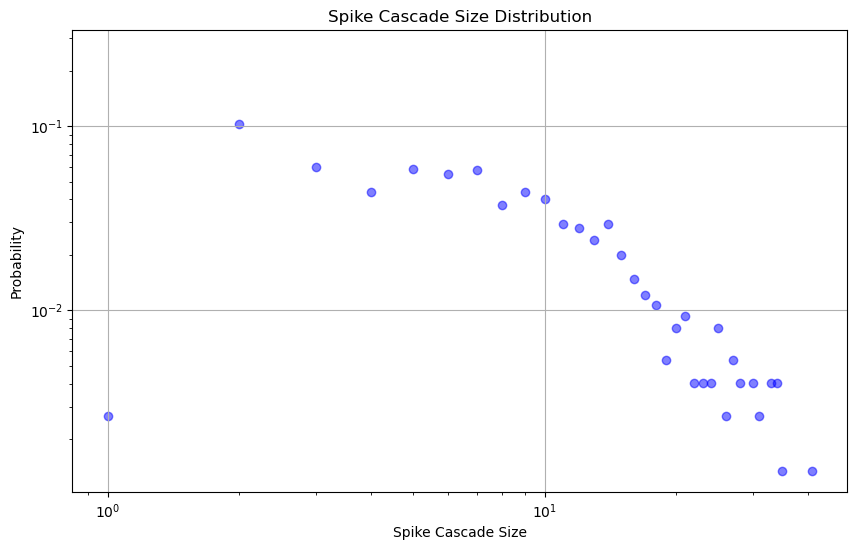

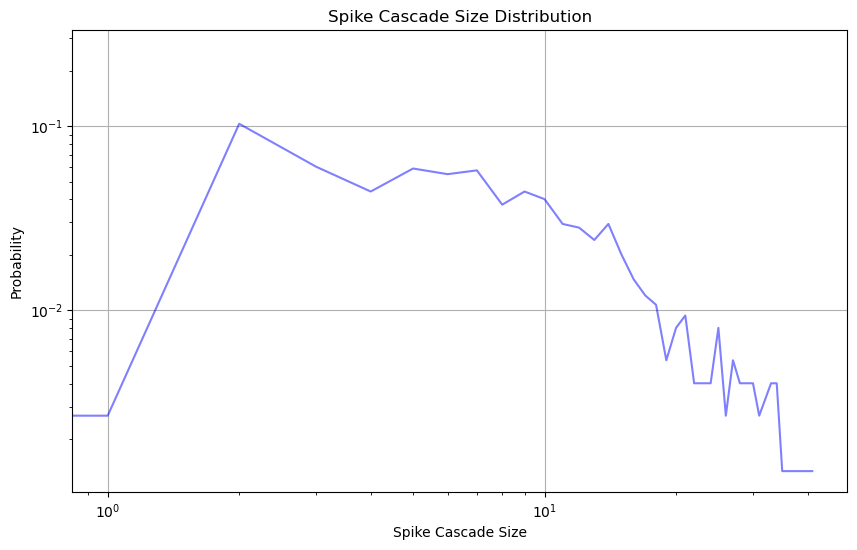

In [22]:
plot_spike_cascade_distribution(patient_spikes)

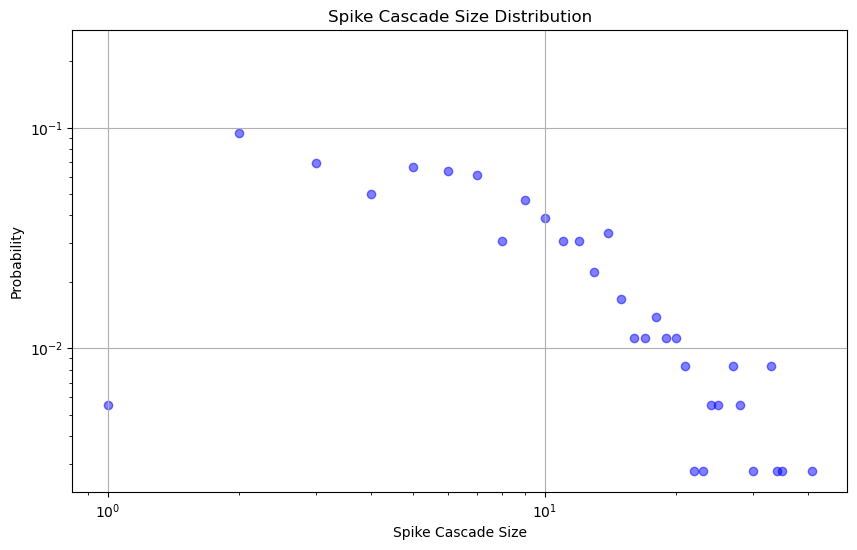

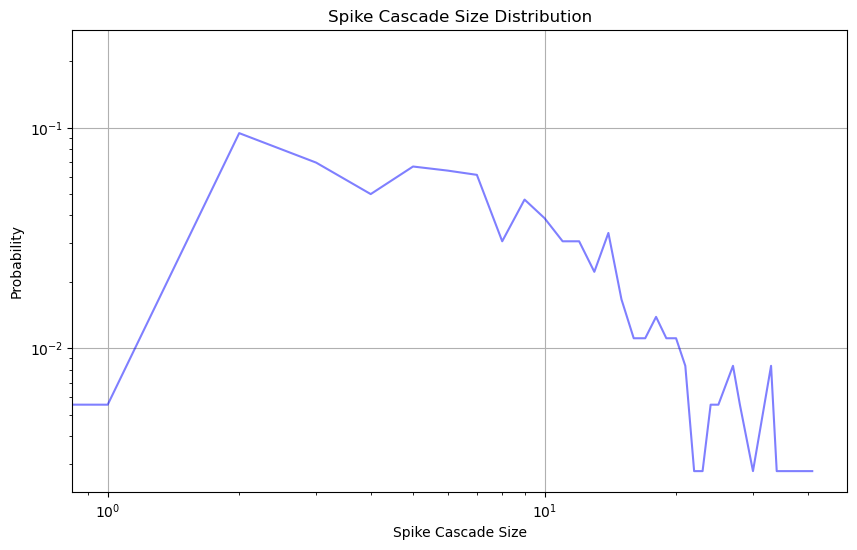

In [28]:
# Select the columns 0 to 60 in patient_spikes
high_aed_spikes = patient_spikes[:, 0 : 60 * 6]
plot_spike_cascade_distribution(high_aed_spikes)

In [29]:
patient_spikes.shape

(64, 747)

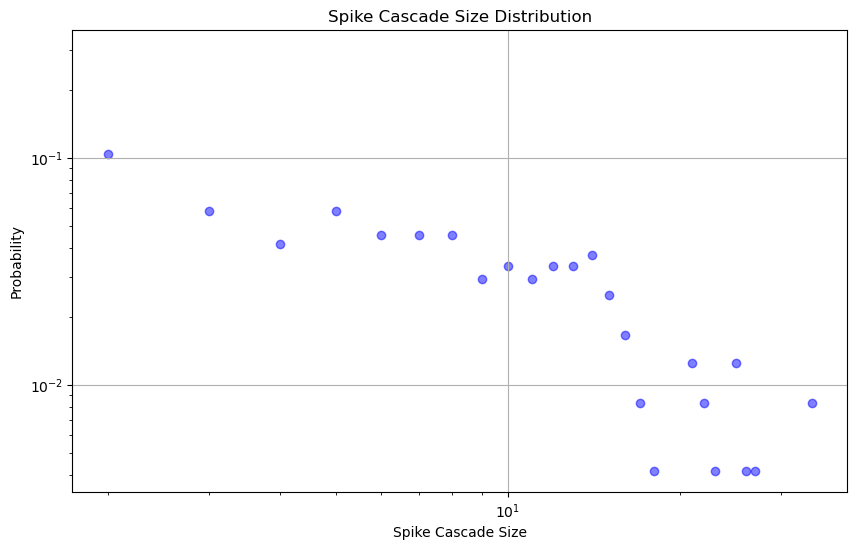

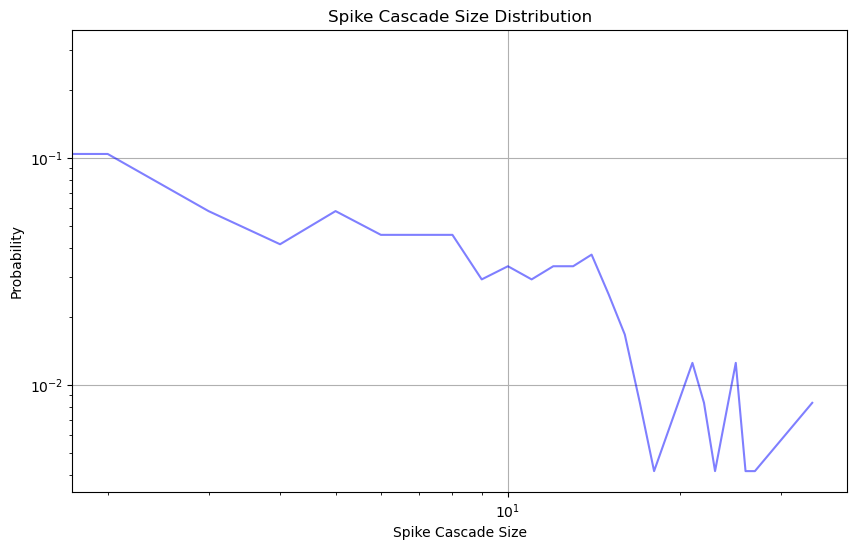

In [31]:
# Select the columns 0 to 60 in patient_spikes
low_aed_spikes = patient_spikes[:, 60 * 6 : 600]
plot_spike_cascade_distribution(low_aed_spikes)